In [1]:
from fn_cfg import *
import params as cfg

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
"Laurel Place Dataset"
localPath = '/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset'
filename = '0405_1_12042019_1129'
version = 1.0

In [ ]:
"Bruyere Dataset"
#version = 1.1
#filename = '0_1_12072018_1206'
#localPath = '/Users/joshuaighalo/Downloads/EEG_Datasets/bruyere'

['/Users/joshuaighalo/Downloads/EEG_Datasets/laurel_place/dataset/0405_1_12042019_1129/0405_1_12042019_1129.bin']
channel P3 utilized
channel P07 utilized
data contains Fz, Cz, Pz & two EOG channels


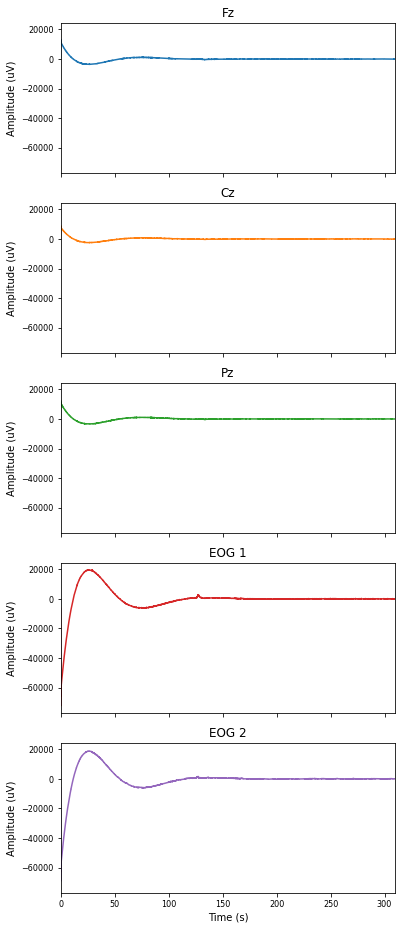

In [3]:
device = importFile.neurocatch()
fileObjects = device.init(version,filename,localPath)
rawEEG = fileObjects[0]
rawEOG = fileObjects[1]
rawEEGEOG = fileObjects[2]
time = fileObjects[3]
trigOutput = fileObjects[4]

plots(time,rawEEGEOG,titles=cfg.channelNames_1,figsize=cfg.figure_size,pltclr=cfg.plot_color_1)

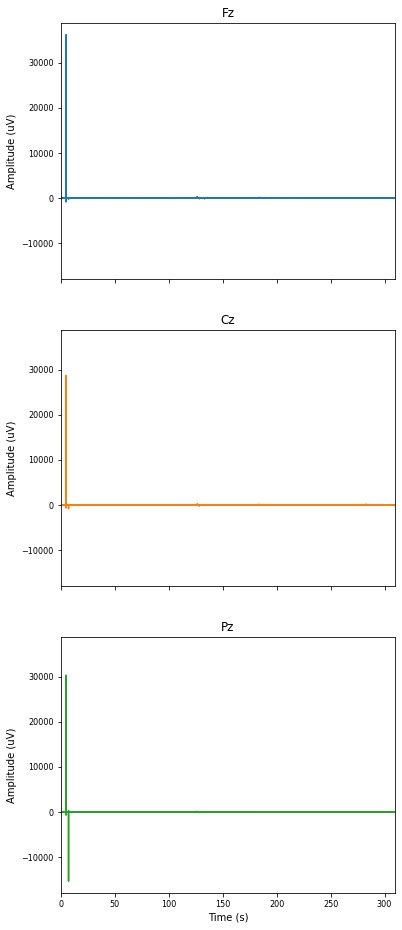

In [4]:
filtering = filters()
adaptiveFilterOutput = filtering.adaptive(rawEEG,rawEOG)
plots(time,adaptiveFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

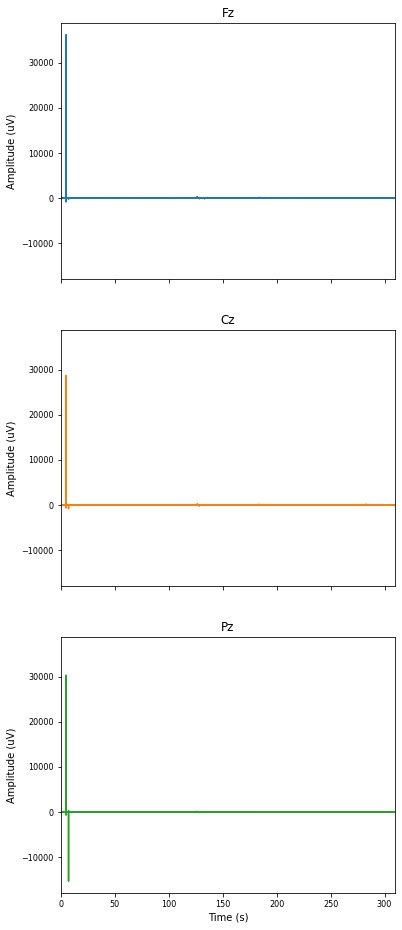

In [5]:
notchFilterOutput = filtering.notch(adaptiveFilterOutput,line,fs)
plots(time,adaptiveFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

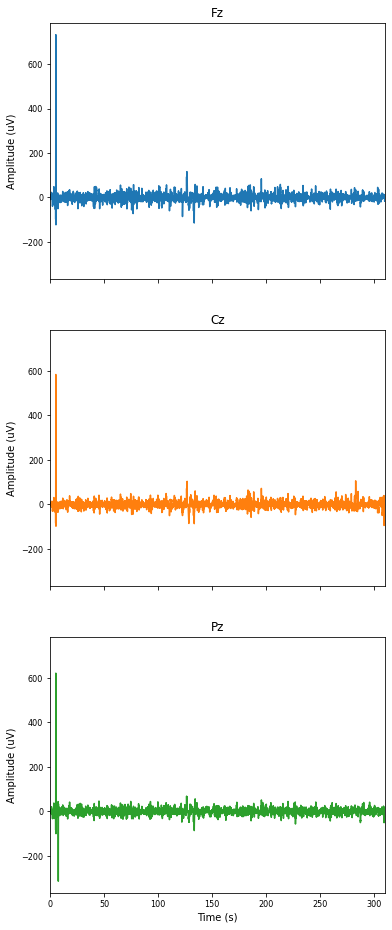

In [6]:
bandPassFilterOutput = filtering.butterBandPass(notchFilterOutput,lowcut=0.1,highcut=5,fs=cfg.fs)
plots(time,bandPassFilterOutput,titles=cfg.channelNames,figsize=cfg.figure_size,pltclr=cfg.plot_color)

In [7]:
snr_Fz = sar(rawEEG[:,0],bandPassFilterOutput[:,0])
snr_Cz = sar(rawEEG[:,1],bandPassFilterOutput[:,1])
snr_Pz = sar(rawEEG[:,2],bandPassFilterOutput[:,2])
print("signal to noise ratio Fz: ",round(snr_Fz,6))
print("signal to noise ratio Cz: ",round(snr_Cz,6))
print("signal to noise ratio Pz: ",round(snr_Pz,6))

signal to noise ratio Fz:  -0.000254
signal to noise ratio Cz:  -0.000175
signal to noise ratio Pz:  -0.000189


In [8]:
erps = erpExtraction()
N1P3 = erps.N100P300(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip)
N4 = erps.N400(trigOutput,bandPassFilterOutput,time,stimTrig=cfg.stimTrig,clip=cfg.clip)
N1P3_Fz = N1P3[0]
N1P3_Cz = N1P3[1]
N1P3_Pz = N1P3[2]
N4_Fz = N4[0]
N4_Cz = N4[1]
N4_Pz = N4[2]
erp_latency = np.array(np.linspace(start=-100, stop=900, num=len(N1P3_Fz[0]),dtype=object),dtype=object)
std_N1P3_Fz = N1P3_Fz[0]

number of std tone event codes: 220
callback! epochs lost for std tone: 10.00%
number of dev tone event codes: 20
callback! epochs lost for dev tone: 15.00%
number of std tone event codes: 220
callback! epochs lost for std tone: 4.00%
number of dev tone event codes: 20
callback! epochs lost for dev tone: 5.00%
number of std tone event codes: 220
callback! epochs lost for std tone: 1.00%
number of dev tone event codes: 20
callback! epochs lost for dev tone: 5.00%
number of con word event codes: 30
callback! epochs lost for con word: 16.00%
number of inc word event codes: 30
callback! epochs lost for inc word: 10.00%
number of con word event codes: 30
callback! epochs lost for con word: 13.00%
number of inc word event codes: 30
callback! epochs lost for inc word: 3.00%
number of con word event codes: 30
callback! epochs lost for con word: 3.00%
number of inc word event codes: 30
notice! epochs lost for inc word: 0.00%


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


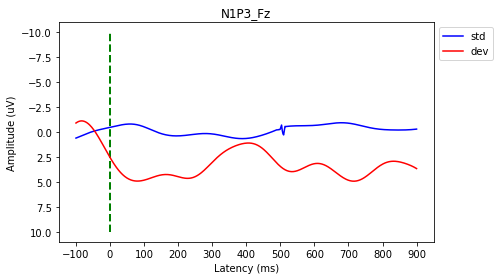

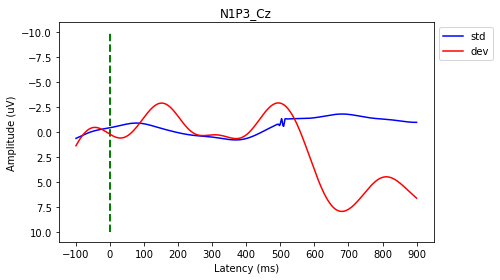

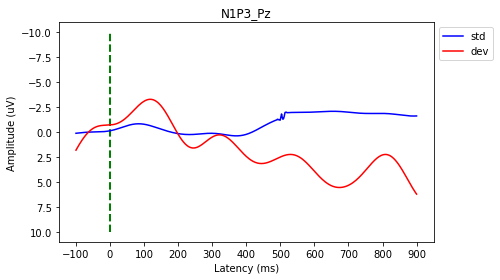

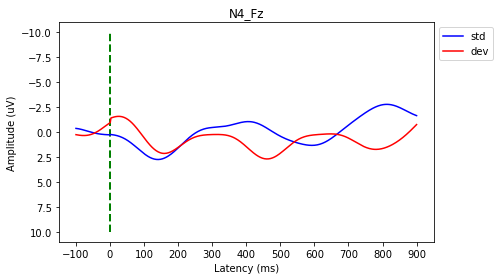

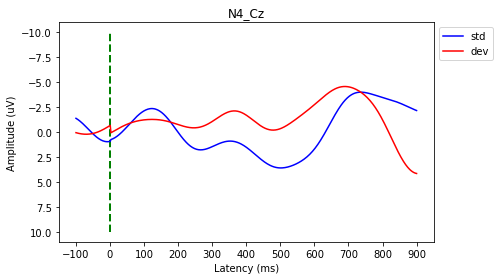

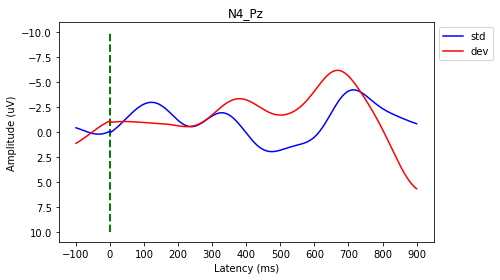

In [13]:
plot_ERPs(N1P3_Fz[0],N1P3_Fz[1],erp_latency,'N1P3_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N1P3_Cz[0],N1P3_Cz[1],erp_latency,'N1P3_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N1P3_Pz[0],N1P3_Pz[1],erp_latency,'N1P3_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N4_Fz[0],N4_Fz[1],erp_latency,'N4_Fz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N4_Cz[0],N4_Cz[1],erp_latency,'N4_Cz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)
plot_ERPs(N4_Pz[0],N4_Pz[1],erp_latency,'N4_Pz','Latency (ms)','Amplitude (uV)','std','dev','b','r',10)

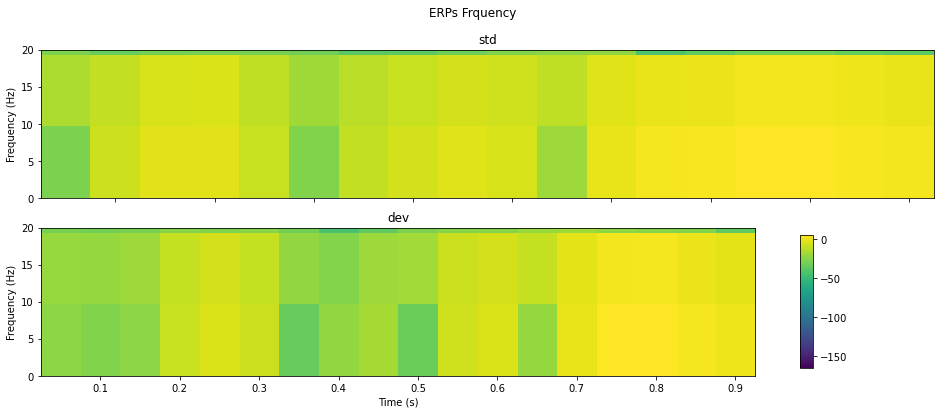

In [10]:
data_1 = N1P3_Cz[0]
data_2 = N1P3_Cz[1]
input_1 = data_1.reshape(len(data_1),1)
input_2 = data_2.reshape(len(data_2),1)
input_ = np.concatenate((input_1,input_2),axis=1)
spectogramPlot(input_,fs,nfft=50,nOverlap=25,y_max=20,figsize=(16,6),subTitles=['std','dev'],title='ERPs Frquency')